<a href="https://colab.research.google.com/github/sharat36/image_captioning/blob/master/ideathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install PyDrive

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1HKoUwJzY6mAahFbbl9vofe-tqbheldL2'})
download.GetContentFile('results.csv')

In [0]:
import pandas as pd

In [0]:
data = pd.read_csv('results.csv',delimiter='|')

In [0]:
data.columns = ['image_name', 'comment_number', 'comment']
#print(data)

In [0]:
import numpy as np

In [0]:
data["comment"][19999] = data["comment"][19998]

In [0]:
descriptions = dict()
image_id = data["image_name"]
for i in range(len(image_id)):
    image_id[i] = image_id[i].split('.')[0]
image_desc = data["comment"]

In [0]:
for i in range(len(image_id)):
    desc_list = []
    for j in range(5):
        if((i+j) <= 158914):
            desc_list.append(image_desc[i+j])
    descriptions[image_id[i]] = desc_list
    i=i+4
#descriptions

In [0]:
import string
#import pdb

In [0]:
table = str.maketrans('', '', string.punctuation)
for key, desc_list in descriptions.items():
    for i in range(len(desc_list)):
        
            desc = desc_list[i]
            
            
            desc = desc.split(" ")
            

            desc = [word.lower() for word in desc]

            desc = [w.translate(table) for w in desc]

            desc = [word for word in desc if len(word)>1]

            desc = [word for word in desc if word.isalpha()]

            desc_list[i] =  ' '.join(desc)
#print(descriptions)            

In [0]:
vocabulary = set()
for key in descriptions.keys():
    [vocabulary.update(d.split()) for d in descriptions[key]]
#vocabulary

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1SNqulB1U4OCc_qvWXdNP7EOwdW2Fq3qP'})
download.GetContentFile('flickr30k_images.zip')

In [19]:
!unzip 'flickr30k_images.zip'

Archive:  flickr30k_images.zip
   creating: flickr30k_images/
   creating: flickr30k_images/flickr30k_images/
  inflating: flickr30k_images/flickr30k_images/2230458748.jpg  
  inflating: flickr30k_images/flickr30k_images/3131519555.jpg  
  inflating: flickr30k_images/flickr30k_images/4725077313.jpg  
  inflating: flickr30k_images/flickr30k_images/4483334217.jpg  
  inflating: flickr30k_images/flickr30k_images/3577235421.jpg  
  inflating: flickr30k_images/flickr30k_images/334167474.jpg  
  inflating: flickr30k_images/flickr30k_images/7579008108.jpg  
  inflating: flickr30k_images/flickr30k_images/2054125670.jpg  
  inflating: flickr30k_images/flickr30k_images/1260501563.jpg  
  inflating: flickr30k_images/flickr30k_images/18865365.jpg  
  inflating: flickr30k_images/flickr30k_images/942399470.jpg  
  inflating: flickr30k_images/flickr30k_images/537532165.jpg  
  inflating: flickr30k_images/flickr30k_images/374176648.jpg  
  inflating: flickr30k_images/flickr30k_images/485921585.jpg  
 

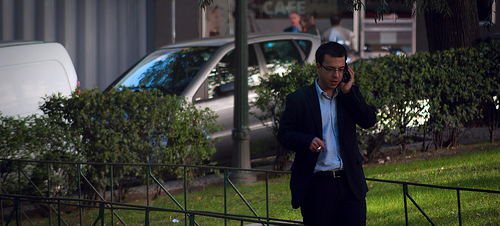

In [20]:
from IPython.display import Image
Image('flickr30k_images/flickr30k_images/8183107966.jpg')

In [39]:
size = len(image_id)
size

158915

In [0]:
train_desc = {}
for i in range(25000*5):
    desc_list = []
    for j in range(5):
        if((i+j) <= 158914):
            desc_list.append('startseq '+image_desc[i+j]+' endseq')
    train_desc[image_id[i]] = desc_list
    i=i+4
table = str.maketrans('', '', string.punctuation)
for key, desc_list in train_desc.items():
    for i in range(len(desc_list)):
        
            desc = desc_list[i]
            
            
            desc = desc.split(" ")
            

            desc = [word.lower() for word in desc]

            desc = [w.translate(table) for w in desc]

            desc = [word for word in desc if len(word)>1]

            desc = [word for word in desc if word.isalpha()]

            desc_list[i] =  ' '.join(desc)

In [0]:
test_desc = {}
for i in range(size - 25000*5):
    desc_list = []
    for j in range(5):
        if((i+j) <= 158914):
            desc_list.append('startseq '+image_desc[i+j]+' endseq')
    test_desc[image_id[i]] = desc_list
    i=i+4
table = str.maketrans('', '', string.punctuation)
for key, desc_list in test_desc.items():
    for i in range(len(desc_list)):
        
            desc = desc_list[i]
            
            
            desc = desc.split(" ")
            

            desc = [word.lower() for word in desc]

            desc = [w.translate(table) for w in desc]

            desc = [word for word in desc if len(word)>1]

            desc = [word for word in desc if word.isalpha()]

            desc_list[i] =  ' '.join(desc)

In [45]:
from keras.applications.inception_v3 import InceptionV3

Using TensorFlow backend.


In [46]:
model = InceptionV3(weights='imagenet')

W0825 08:15:23.757579 140187142756224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0825 08:15:23.803335 140187142756224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0825 08:15:23.823958 140187142756224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0825 08:15:23.878346 140187142756224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0825 08:15:23.882435 1401871427

96116736/96112376 [==============================] - 1s 0us/step


In [0]:
from keras import Model

In [0]:
model_new = Model(model.input, model.layers[-2].output)

In [0]:
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

In [55]:
for image_path in data["image_name"]:
    img = image.load_img('flickr30k_images/flickr30k_images/'+image_path+'.jpg', target_size=(299, 299))

KeyboardInterrupt: ignored

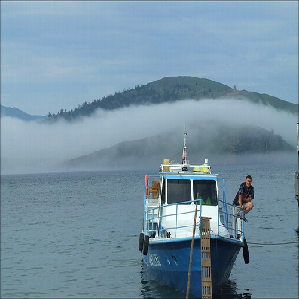

In [53]:
img